# Trafic Sign Recognition

### Installing the required Library

In [34]:
#%pip install tensorflow keras sklearn matplotlib pandas pil

### Data Exploration

The data available is divided into training and testing data .The testing data is grouped into 43 classes ,each class represent the type of the trafic signal.

#### Import Library 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from keras.preprocessing import image as keras_image

import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [36]:
cur_path=os.getcwd()
print(cur_path)

d:\generative ai\TraficSignRecognition-CNN-and-Keras--main


In [37]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd()
print(cur_path)
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    print("Current path:", path)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except Exception as e:
            print("Error Loading image", i, ":", e)

data = np.array(data)
labels = np.array(labels)

d:\generative ai\TraficSignRecognition-CNN-and-Keras--main
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\0


Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\1
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\2
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\3
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\4
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\5
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\6
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\7
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\8
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\9
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\10
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\11
Current path: d:\generative ai\TraficSignRecognition-CNN-and-Keras--main\train\12
Current path: d:\generati

In [38]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [39]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train,y_test)

(31367, 30, 30, 3) (7842, 30, 30, 3) [36 28  2 ... 39  1 10] [26 15 13 ...  8  7 20]


Convert the lables into one Hot encoder

In [40]:
y_train , y_test=to_categorical(y_train,43),to_categorical(y_test,43)


### CNN model 

In [41]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model Training and Validation


In [42]:
epochs = 15
anc = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.2792 - loss: 3.6506 - val_accuracy: 0.8017 - val_loss: 0.8243
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.7022 - loss: 1.0084 - val_accuracy: 0.9183 - val_loss: 0.3282
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.8035 - loss: 0.6457 - val_accuracy: 0.9402 - val_loss: 0.2258
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.8537 - loss: 0.4833 - val_accuracy: 0.9444 - val_loss: 0.2071
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.8749 - loss: 0.4136 - val_accuracy: 0.9656 - val_loss: 0.1353
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.8941 - loss: 0.3624 - val_accuracy: 0.9665 - val_loss: 0.1122
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.9109 - loss: 0.2983 - val_accuracy: 0.9698 - val_loss: 0.1088
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9194 - loss: 0.2727 - 

In [43]:
%pip install pydot

In [44]:
# Visualize the network architecture
from keras.models import load_model
model = load_model('my_model.h5')
# Function to classify a single image
def classify_image(file_path):
    # Load and preprocess the image
    img = keras_image.load_img(file_path, target_size=(30, 30))
    img_array = keras_image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0).astype('float32')  # Add batch dimension
    
    # Perform prediction
    pred = model.predict(img_array)
    
    # Get the predicted class
    predicted_class = np.argmax(pred)
    
    # Print the predicted class
    print("Predicted class:", predicted_class)

folders = ['train', 'test']
file_names = ['D:/generative ai/TraficSignRecognition-CNN-and-Keras--main/Train/1/00001_00000_00000.png', 'D:/generative ai/TraficSignRecognition-CNN-and-Keras--main/Test/00000.png']

# Classify images from both folders
for folder, file_name in zip(folders, file_names):
    # Construct the full file path
    file_path = os.path.join(cur_path, folder, file_name)
    
    # Classify the image using the specified file path
    print(f"\nClassifying image from {folder} folder:")
    classify_image(file_path)

# Classify the image using the specified file path
classify_image(file_path)
tf.keras.utils.plot_model(model, show_shapes=True)


Classifying image from train folder:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class: 2

Classifying image from test folder:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: 2
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


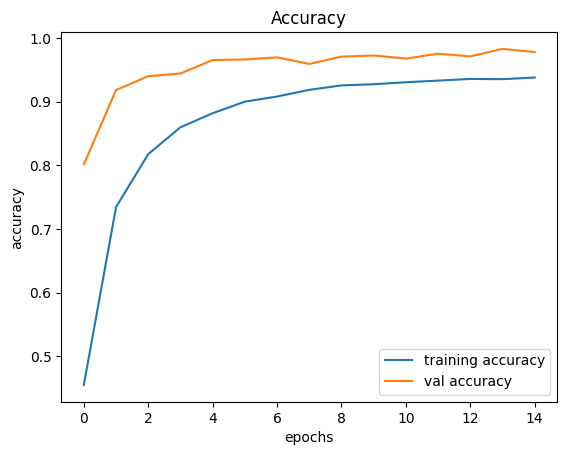

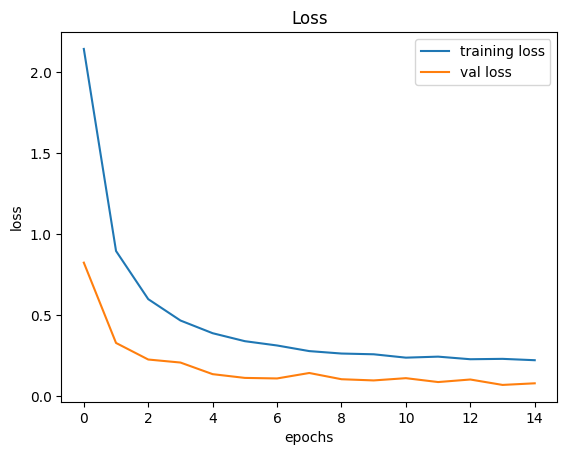

In [45]:
#plotting graphs for accuracy

model.save("my_model.h5")
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [46]:
from keras.metrics import Accuracy, Precision, Recall, F1Score

# Instantiate metric objects for accuracy, precision, recall, and F1 score
accuracy_metric = Accuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = F1Score()

# Compile the model and specify the metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[accuracy_metric, precision_metric, recall_metric, f1_score_metric])

# Evaluate the model
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test, batch_size=32)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1_score)




246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0000e+00 - f1_score: 0.0024 - loss: 3.4780 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Test Loss: 3.4820733070373535
Test Accuracy: 0.0
Test Precision: tf.Tensor(
[0.         0.         0.10853834 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ], shape=(43,), dtype=float32)
Test Recall: 0.0
Test F1 Score: 0.0
